In [1]:
import pandas as pd

In [2]:
# Load the dataset
Wine_data = pd.read_csv(r"C:\Users\DELL\Downloads\WineQT.csv")

In [3]:
pd.set_option('display.max.rows', 1146)

In [4]:
Wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# Summary statistics
print(Wine_data.info())
print(Wine_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

In [6]:
# Droping unnecessary columns like 'Id'
Wine_data = Wine_data.drop(columns=['Id'], errors='ignore')

In [7]:
Wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Check for duplicate rows 
Wine_data.duplicated().sum()

125

In [9]:
# Removing duplicated rows 
Wine_data = Wine_data.drop_duplicates()

In [10]:
Wine_data.shape

(1018, 12)

In [11]:
# Check for missing values
Wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

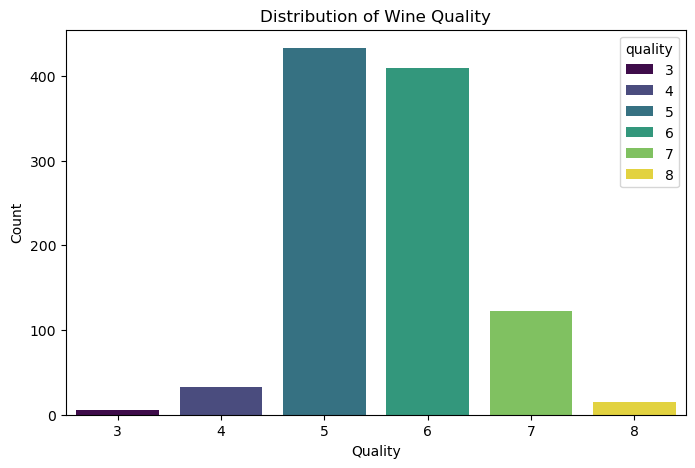

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable (quality)
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=Wine_data, hue='quality', palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

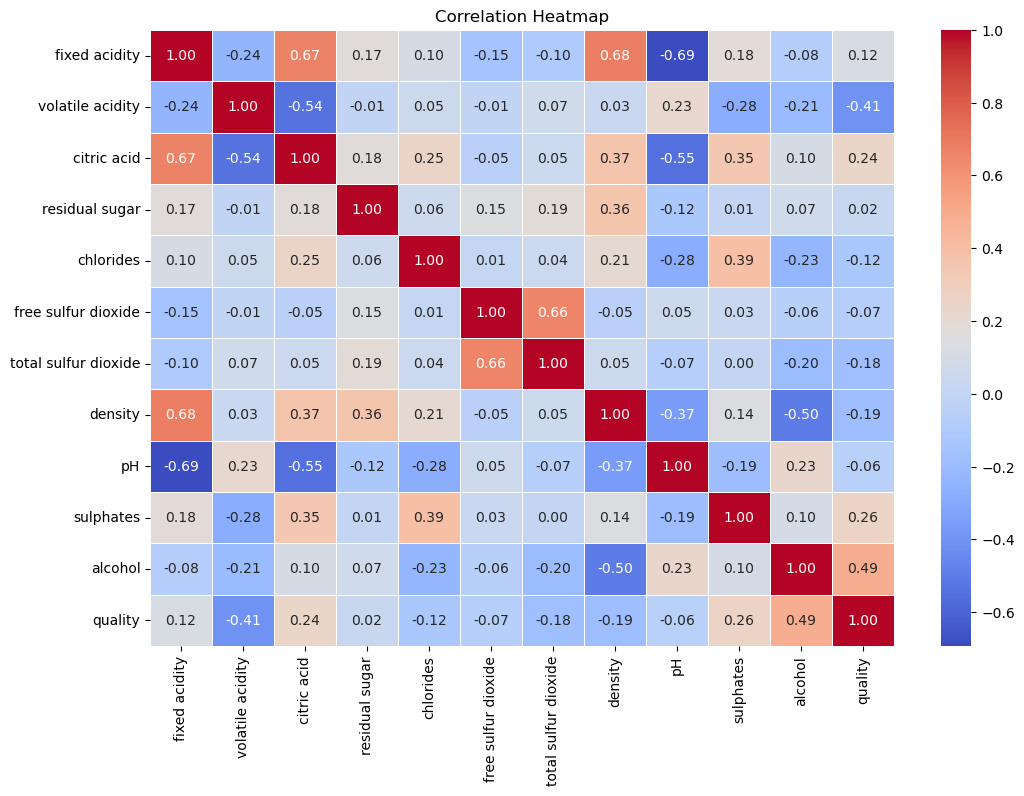

In [13]:
# Correlation heatmap to visualize relationships between features and quality
plt.figure(figsize=(12, 8))
correlation_matrix = Wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

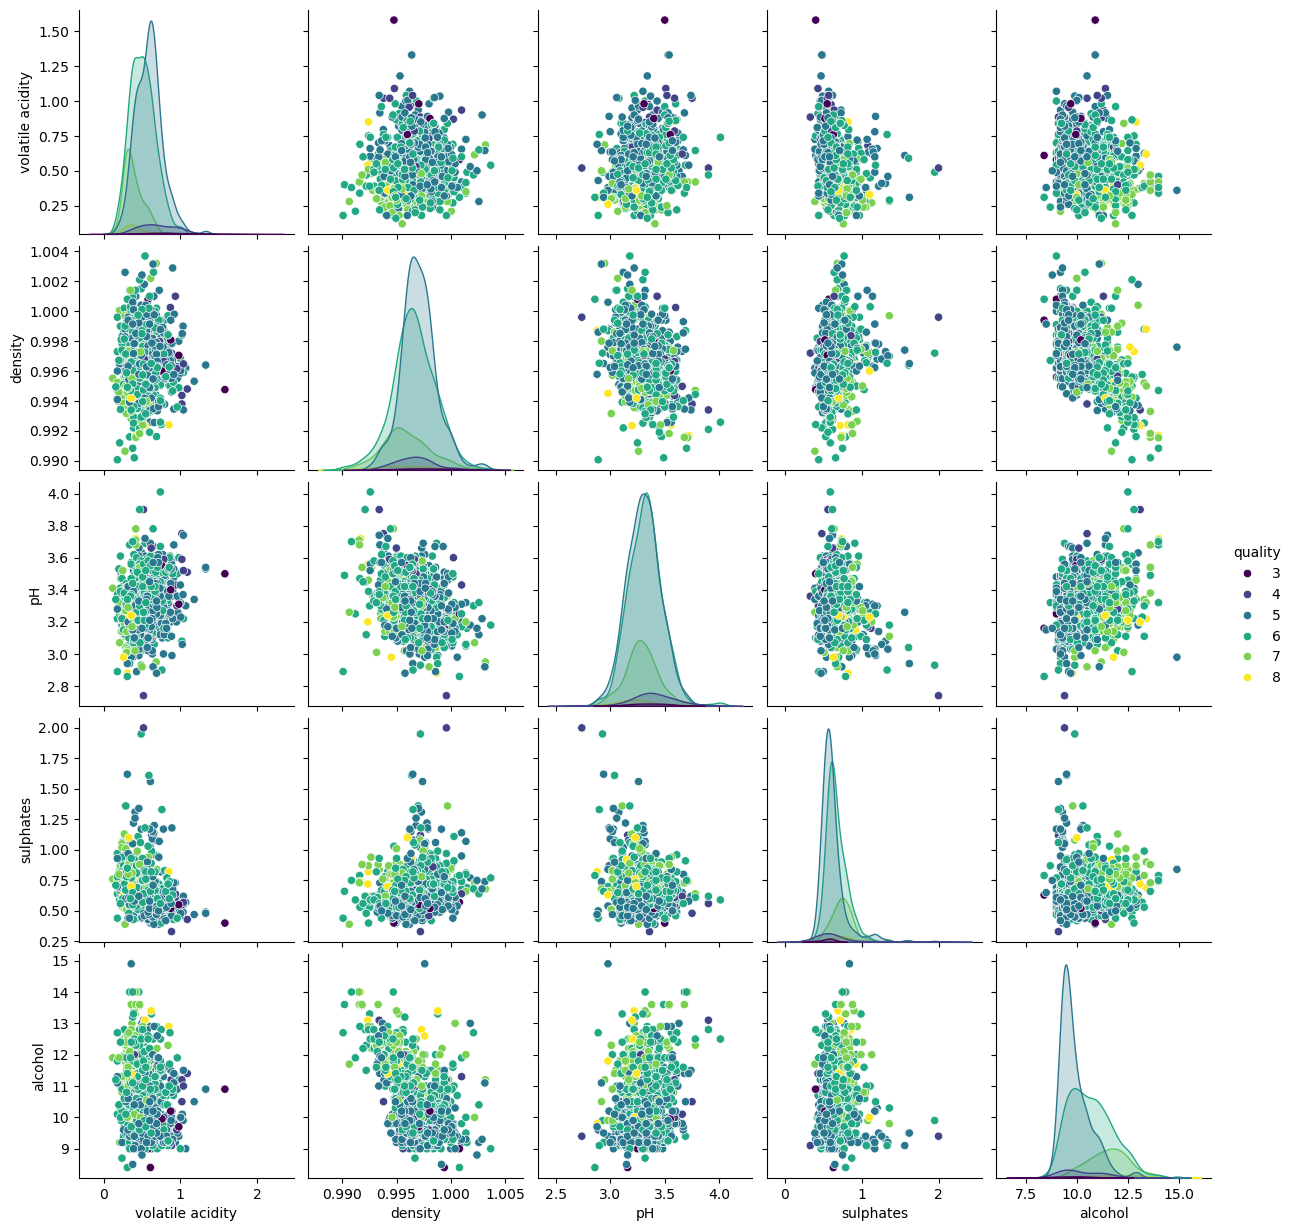

In [14]:
# Pairplot for selected features to explore distributions and relationships
selected_features = ['volatile acidity', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
sns.pairplot(Wine_data[selected_features], hue='quality', palette='viridis', diag_kind='kde')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = Wine_data.drop('quality', axis=1)
y = Wine_data['quality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nTraining and Testing Data Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Training and Testing Data Shapes:
X_train: (814, 11) X_test: (204, 11)
y_train: (814,) y_test: (204,)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

print("\nModels trained successfully.")


Models trained successfully.


In [17]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate models
models = {'Random Forest': rf_model, 'SGD': sgd_model, 'SVC': svc_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Evaluation")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))



Random Forest Model Evaluation
Accuracy: 0.5441
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.60      0.67      0.63        84
           6       0.48      0.59      0.53        74
           7       0.61      0.44      0.51        25
           8       0.00      0.00      0.00         7

    accuracy                           0.54       204
   macro avg       0.28      0.28      0.28       204
weighted avg       0.50      0.54      0.52       204


SGD Model Evaluation
Accuracy: 0.5490
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.64      0.60      0.62        84
           6       0.47      0.66      0.55        74
           7       0.62      0.52      0.57        2

In [18]:
from sklearn.svm import SVC

# Initialize and train SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc.predict(X_test)

# Evaluate the model
print("SVC Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(classification_report(y_test, y_pred_svc, zero_division=0))


SVC Classifier Results:
Accuracy: 0.5539
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.65      0.71      0.68        84
           6       0.47      0.61      0.53        74
           7       0.47      0.32      0.38        25
           8       0.00      0.00      0.00         7

    accuracy                           0.55       204
   macro avg       0.27      0.27      0.27       204
weighted avg       0.50      0.55      0.52       204



In [19]:
from sklearn.linear_model import SGDClassifier

# Initialize and train SGD Classifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

# Predict on the test set
y_pred_sgd = sgd.predict(X_test)

# Evaluate the model
print("SGD Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd):.4f}")
print(classification_report(y_test, y_pred_sgd, zero_division=0))


SGD Classifier Results:
Accuracy: 0.5490
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.64      0.60      0.62        84
           6       0.47      0.66      0.55        74
           7       0.62      0.52      0.57        25
           8       0.00      0.00      0.00         7

    accuracy                           0.55       204
   macro avg       0.29      0.30      0.29       204
weighted avg       0.51      0.55      0.52       204



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Classifier Results:
Accuracy: 0.5441
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.60      0.67      0.63        84
           6       0.48      0.59      0.53        74
           7       0.61      0.44      0.51        25
           8       0.00      0.00      0.00         7

    accuracy                           0.54       204
   macro avg       0.28      0.28      0.28       204
weighted avg       0.50      0.54      0.52       204



In [21]:
# Compare the models' accuracies
results = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SGD Classifier": accuracy_score(y_test, y_pred_sgd),
    "SVC": accuracy_score(y_test, y_pred_svc)
}

best_model = max(results, key=results.get)
print(f"Best Model: {best_model} with Accuracy: {results[best_model]:.4f}")


Best Model: SVC with Accuracy: 0.5539
